In [17]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline

In [2]:
path = "D:/data cleaning/Chrome Driver/chromedriver-win64/chromedriver.exe"
s = Service(path)

# Setup Chrome options
options = Options()

# Start browser
driver = webdriver.Chrome(options=options,service=s)
driver.get("https://x.com")  # Load domain first to set base cookies

# Wait a bit for page load
time.sleep(3)

# Your copied cookies from DevTools
cookies = [
    {"name": "auth_token", "value": "1d0077e2bbdab26848b2a715b548065f62a30170"},
    {"name": "ct0", "value": "2397af26f2088e7b23d3022914420f647d4e24e1783a992185f9cda71e195788ddd7daa744c6f4541ae1181c232e50591dd7a823f734850b4c9c65c59da26088b8f57577a35dca3dafa74856be28fd6a"},
    {"name": "twid", "value": "u%3D1151873054596710400"},
    {"name": "guest_id", "value": "v1%3A173765736390788684"},
    # Add more if you copied them
]

# Add cookies to the browser
for cookie in cookies:
    driver.add_cookie(cookie)

driver.get("https://x.com/home")
time.sleep(1)
driver.get("https://x.com/explore")
time.sleep(3)


In [3]:
box = driver.find_element(By.CSS_SELECTOR, 'input[aria-label="Search query"]')
box.send_keys("indian politics")
box.send_keys(Keys.RETURN)
time.sleep(5)

In [4]:
for _ in range(5):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(4)

In [5]:
data = []
tweets = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')
print(f"Found {len(tweets)} tweets")
for tweet in tweets:
    content = tweet.text
    try:
        lines = content.splitlines()  
        data.append(lines)
    except:
        data.append(np.nan)


Found 10 tweets


In [6]:
data = [' '.join(tweet[4:-3]) for tweet in data if isinstance(tweet, list) and len(tweet) > 4]

In [10]:
dic = {}
p = pipeline("sentiment-analysis")
for d in data:
    dic[d] = p(d)[0]['label']
    print(f"{d}:{dic[d]}")
    print('-'*15)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


Jul 5 Automated Replying to  @TrumpDailyPosts Zohran Mamdani’s college application fraud isn’t just personal hypocrisy—it’s a symptom of systemic rot. Checking “Black” while admitting he’s Indian-Ugandan exposes how identity politics corrupt merit-based systems. Columbia’s race-based admissions, designed to boost certain Show more 2:NEGATIVE
---------------
Indian Culture attacked in U.S. Politics? The Zohran Mamdani controversy  Watch: https://youtu.be/EwdR09Qyjt8 | #ZohranMamdani #IndianCulture #BrandonGill #NYCMayor #USPolitics:NEGATIVE
---------------
Indians need to mature mentally before they mature politically. Indian approach to even Domestic Politics js extremely stupid, but somehow they want to engage themselves in International/Extra-National issues. Aravind @aravind · Jul 2:NEGATIVE
---------------
Replying to  @Nagarjun__s If you want to see South Indian as PM then your leaders should know how to win hearts of complete India. By playing petty politics of language and regio

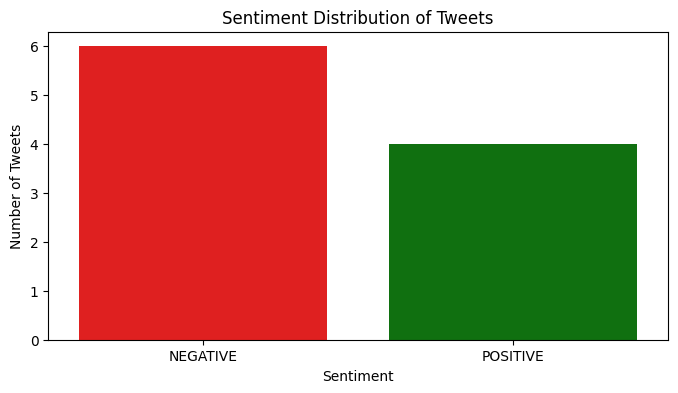

In [21]:
df = pd.DataFrame(list(dic.items()), columns=['tweet', 'sentiment'])

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette={'POSITIVE': 'green', 'NEGATIVE': 'red'}, legend=False)
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()